In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [20]:
gamma = 1 # discounting rate
rewardSize = -1
gridSize = 6
terminationStates = [[0,1], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

In [21]:
def actionRewardFunction(initialPosition, action):
    
    if initialPosition in terminationStates:
        return initialPosition, 0
    
    reward = rewardSize
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or 6 in finalPosition: 
        finalPosition = initialPosition
        
    return finalPosition, reward

In [52]:
valueMap = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [38]:
states

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [5, 0],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 5]]

In [53]:
valueMap

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [56]:
tmp=np.copy(valueMap)
tmp=tmp+1e-4
tmp

array([[0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
       [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
       [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
       [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
       [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
       [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]])

In [57]:
np.all(np.abs(tmp-valueMap)<1e-5)

False

In [51]:
np.all(tmp==valueMap)

False

In [27]:
actionMap = 0.25 * np.ones((np.shape(states)[0], np.shape(actions)[0]))
actionMap

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.

In [35]:
np.all(actionMap[0]==actionMap[1])

False

In [24]:
deltas = []
for it in range(numIterations):
    copyValueMap = np.copy(valueMap)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    valueMap = copyValueMap
    if it in [0,1,2,9, 99, numIterations-2,numIterations-1]:
        print("Iteration {}".format(it+1))
        print(valueMap)
        print("")

Iteration 1
[[-1.  0. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  0.]]

Iteration 2
[[-1.75  0.   -1.75 -2.   -2.   -2.  ]
 [-2.   -1.75 -2.   -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -2.   -2.   -1.75]
 [-2.   -2.   -2.   -2.   -1.75  0.  ]]

Iteration 3
[[-2.375   0.     -2.4375 -2.9375 -3.     -3.    ]
 [-2.875  -2.5    -2.875  -3.     -3.     -3.    ]
 [-3.     -2.9375 -3.     -3.     -3.     -3.    ]
 [-3.     -3.     -3.     -3.     -3.     -2.9375]
 [-3.     -3.     -3.     -3.     -2.875  -2.4375]
 [-3.     -3.     -3.     -2.9375 -2.4375  0.    ]]

Iteration 10
[[-5.18192291  0.         -6.32034683 -8.7159996  -9.57571411 -9.83536148]
 [-7.56069183 -6.65256119 -8.1984024  -9.23065567 -9.67491913 -9.80172348]
 [-9.03197098 -8.88976288 -9.26709747 -9.56587219 -9.62711334 -9.55506516]
 [-9.67467117 -9.6

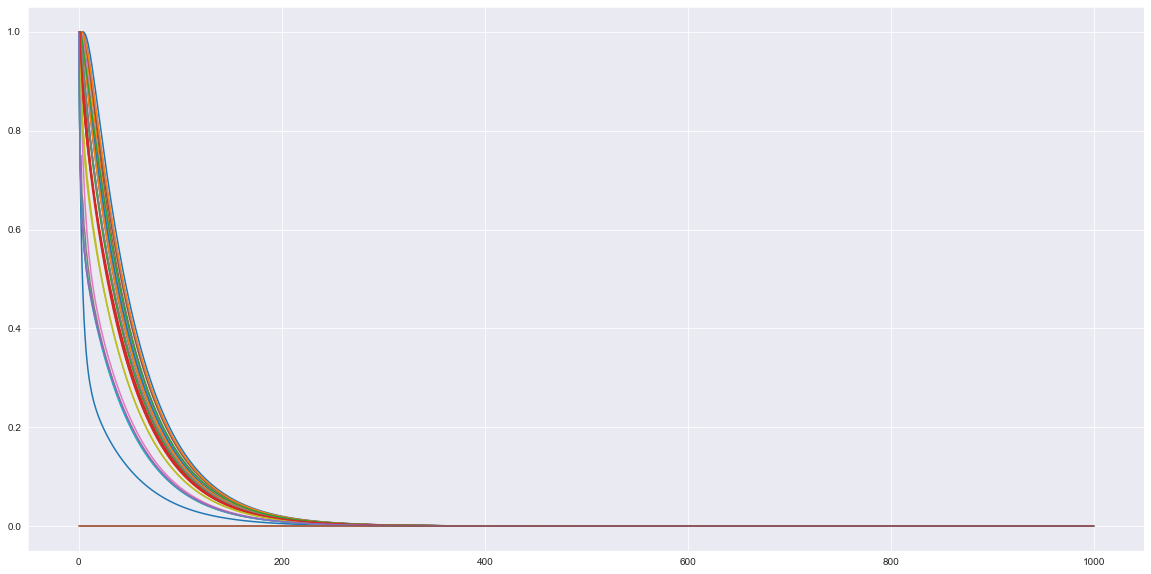

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)